**Finlatics Ml project on Ad sales**

In [ ]:
import pandas as pd
df = pd.read_excel('adds.xlsx')
print(df.head())

  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9


missing values

In [ ]:
df.isnull().sum()

,0
Campaign,0
TV,0
Radio,2
Newspaper,0
Sales,0


removing two null values from radio

In [ ]:
df = df.dropna(subset=['Radio'])
print(df.isnull().sum())


Campaign     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
df.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


1.	What is the average amount spent on TV advertising in the dataset?

In [ ]:
average = df['TV'].mean()
print(f"Average amount spent on TV advertising: {average:.3f} rupees")


Average amount spent on TV advertising: 146.786 rupees


2.	What is the correlation between radio advertising expenditure and product sales?

In [ ]:
correlation_radio_sales = df['Radio'].corr(df['Sales'])
print(f"Correlation between Radio expenditure and Sales: {correlation_radio_sales:.2f}")


Correlation between Radio expenditure and Sales: 0.35


3.	Which advertising medium has the highest impact on sales based on the dataset?

In [ ]:
correlations = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
print(correlations['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.901372
Radio        0.349728
Newspaper    0.159125
Name: Sales, dtype: float64


ans:TV has highest correlation with sales

4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

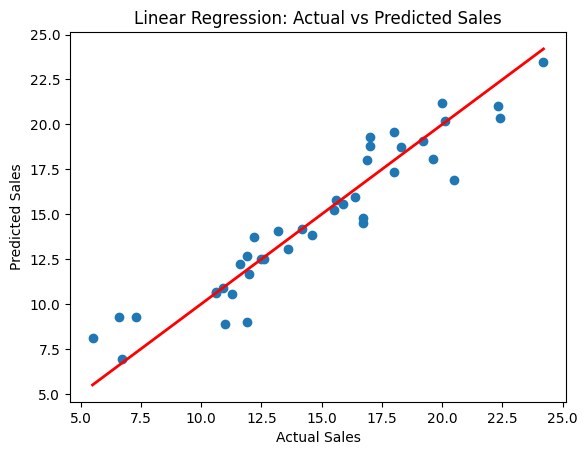

R² score (non-normalized data): 0.90
Mean Squared Error (non-normalized data): 2.02


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Actual vs Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line for perfect predictions
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² score (non-normalized data): {r2:.2f}")
print(f"Mean Squared Error (non-normalized data): {mse:.2f}")


5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

In [ ]:
# New data for prediction
data1 = np.array([[200, 40, 50]])

# Predict sales
predicted_sales = model.predict(data1)
print(f"Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: {predicted_sales[0]:.2f} units")


Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: 19.82 units


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6.	How does the performance of the linear regression model change when the dataset is normalized?

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Make predictions
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calculate performance metrics
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"R² score (normalized data): {r2_scaled:.2f}")
print(f"Mean Squared Error (normalized data): {mse_scaled:.2f}")


R² score (normalized data): 0.90
Mean Squared Error (normalized data): 2.02


no much change in preformance as performance metrics is almost similar

7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

In [ ]:
# Use only Radio and Newspaper
X_radio_newspaper = df[['Radio', 'Newspaper']]

# Split the data
X_train_radio, X_test_radio, y_train, y_test = train_test_split(X_radio_newspaper, y, test_size=0.2, random_state=42)

# Fit the model
model_radio_newspaper = LinearRegression()
model_radio_newspaper.fit(X_train_radio, y_train)

# Make predictions
y_pred_radio_newspaper = model_radio_newspaper.predict(X_test_radio)

# Calculate performance metrics
mse_radio_newspaper = mean_squared_error(y_test, y_pred_radio_newspaper)
r2_radio_newspaper = r2_score(y_test, y_pred_radio_newspaper)

print(f"R² score (Radio + Newspaper): {r2_radio_newspaper:.2f}")
print(f"Mean Squared Error (Radio + Newspaper): {mse_radio_newspaper:.2f}")


R² score (Radio + Newspaper): -0.05
Mean Squared Error (Radio + Newspaper): 21.05


Ans:**This model performs poorly, as evidenced by the negative R² score and high MSE**